In [104]:
import math
import matplotlib.pyplot as plt
import numpy as np


def get_rand_color():
    return np.random.rand(), np.random.rand(), np.random.rand()


In [105]:
# tunable parameters
alpha = 0.3
update_period = 0.2  # seconds

In [106]:
# Time Constant
# https://en.wikipedia.org/wiki/Exponential_smoothing#Time_constant
tau = - update_period / (math.log(1 - alpha))
print(f'tau: {tau}')

# Rise Time
rise_time = 2.2 * tau  # Rise time of first order system
print(f'rise_time: {rise_time}')

# Settling Time
settling_time = 4 * tau
print(f'settling_time: {settling_time}')

tau: 0.5607346504114258
rise_time: 1.2336162309051368
settling_time: 2.242938601645703


Text(0, 0.5, 'y')

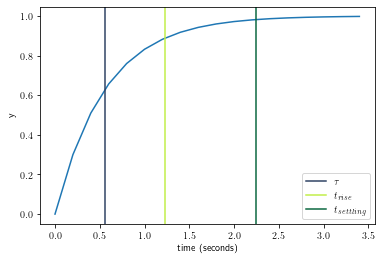

In [107]:
# Recursive EWMA Definition
# y = alpha * r + (1-alpha) * y_prev

r = 1

# Actual Implementation
runtime = settling_time * 1.5
iterations = math.ceil(runtime / update_period)
y = 0
y_vals = [y]
t_vals = [0]
for i in range(1, iterations + 1):
    y -= alpha * y
    y += alpha * r
    y_vals.append(y)
    t_vals.append(i * update_period)

plt.rcParams['text.usetex'] = True
plt.plot(t_vals, y_vals)
plt.axvline(x=tau, color=get_rand_color(), label=r'$\tau$')
plt.axvline(x=rise_time, color=get_rand_color(), label='$t_{rise}$')
plt.axvline(x=settling_time, color=get_rand_color(), label='$t_{settling}$')
plt.legend()
plt.xlabel("time (seconds)")
plt.ylabel("y")
